In [1]:
import sys
rootDir = "../../"
sys.path.append(rootDir + "Analysis/Util/")
sys.path.append(rootDir + "Database/")

from DatabaseAPI import DatabaseAPI
import numpy as np
from get_time_interval_data import *

from Mapping import *
from PCA import *
import pickle

for stuff in sys.path:
    print(stuff)

/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload

/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
../../Analysis/Util/
../../Database/
../../Database/Tables
../
../
../../Analysis/Util


In [2]:
bigRoom = pickle.load(open("../../Analysis/Util/bigEnufTable.p", "rb"))

# Available Mics: [0,1,3,4,5]
CP_LIST = bigRoom["cp_list"]
ROOM_LIST = bigRoom["room_list"]

# Available Mics: [0,1,2,3,4,5]
square_DOA = bigRoom["square_DOA"]
square_Matrix = bigRoom["square_Matrix"]

square_raw = bigRoom["sqRaw"]
cp_raw = bigRoom["cpRaw"]

# Available Mics: [0,1,2,3,4,5]
table1_DOA = bigRoom["table1_DOA"]
table1_Matrix = bigRoom["table1_Matrix"]

# Available Mics: [0,1,2,3,4,5]
line_DOA = bigRoom["line_DOA"]
line_Matrix = bigRoom["line_Matrix"]

# Available Mics: [0,1,2,3,4,5]
point_DOA = bigRoom["point_DOA"]
point_Matrix = bigRoom["point_Matrix"]

# Available Mics: [0,1,2,3,4,5]
table2_DOA = bigRoom["table2_DOA"]
table2_Matrix = bigRoom["table2_Matrix"]

CP_INDICES = [i for i in range(12)]

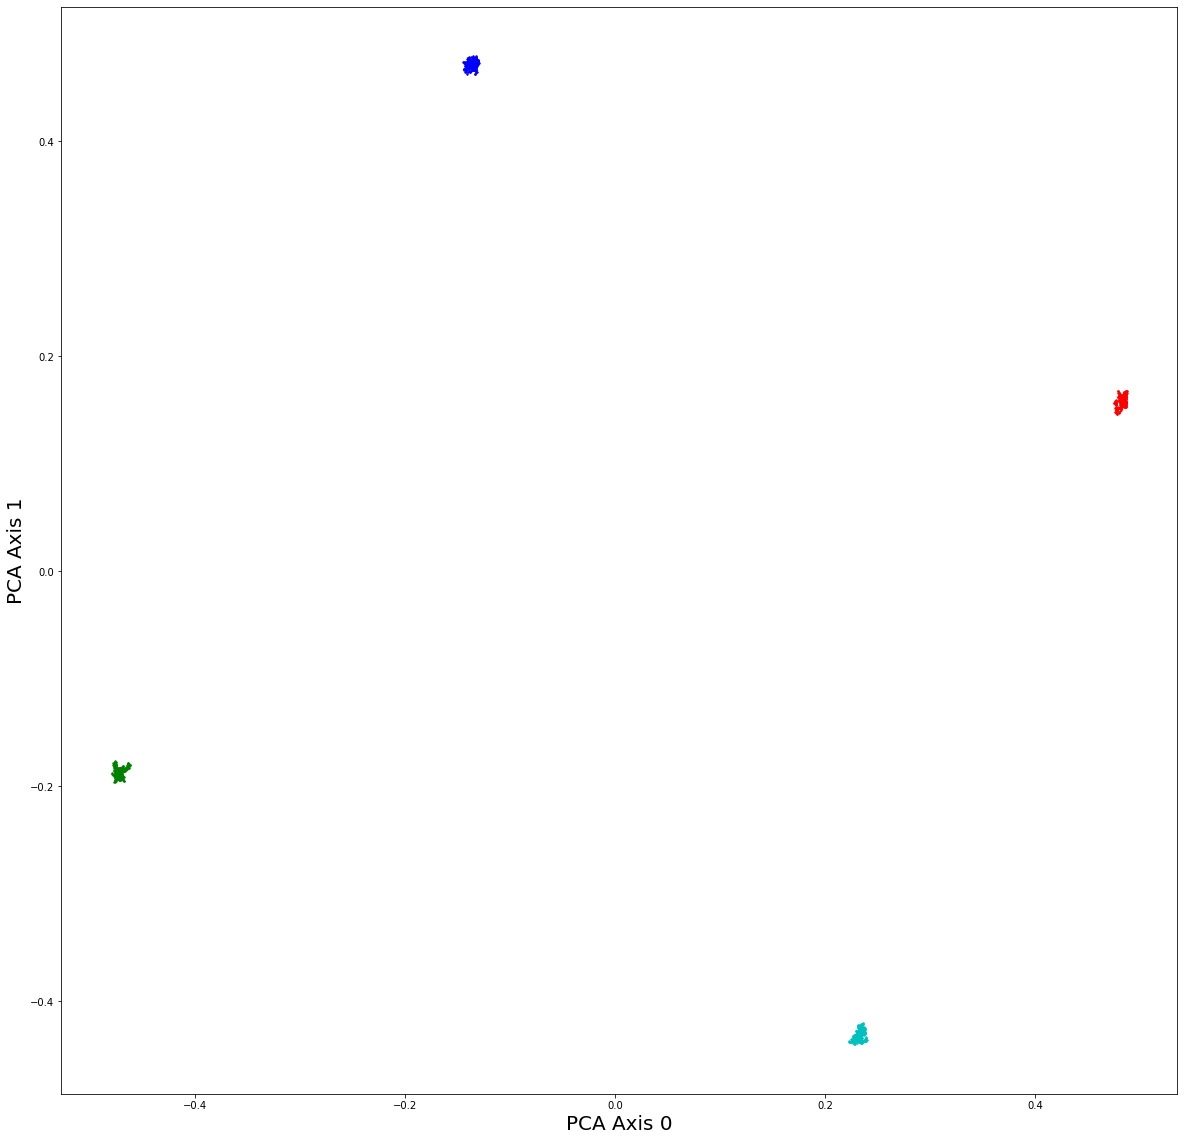

In [3]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

cp_eigValues, cp_eigVector = get_eigen_vectors(np.vstack([CP_LIST[i] for i in CP_INDICES]))

dataProj0 = project_to_eigen_vectors(CP_LIST[0], 2, cp_eigValues, cp_eigVector)
dataProj3 = project_to_eigen_vectors(CP_LIST[3], 2, cp_eigValues, cp_eigVector)
dataProj6 = project_to_eigen_vectors(CP_LIST[6], 2, cp_eigValues, cp_eigVector)
dataProj9 = project_to_eigen_vectors(CP_LIST[9], 2, cp_eigValues, cp_eigVector)

fig = plt.figure(figsize = [20,20])
plt.scatter(dataProj0[:,0], dataProj0[:,1], c='r', s=2)
plt.scatter(dataProj3[:,0], dataProj3[:,1], c='b', s=2)
plt.scatter(dataProj6[:,0], dataProj6[:,1], c='g', s=2)
plt.scatter(dataProj9[:,0], dataProj9[:,1], c='c', s=2)

plt.xlabel("PCA Axis 0", fontsize=20)
plt.ylabel("PCA Axis 1", fontsize=20)
plt.show()

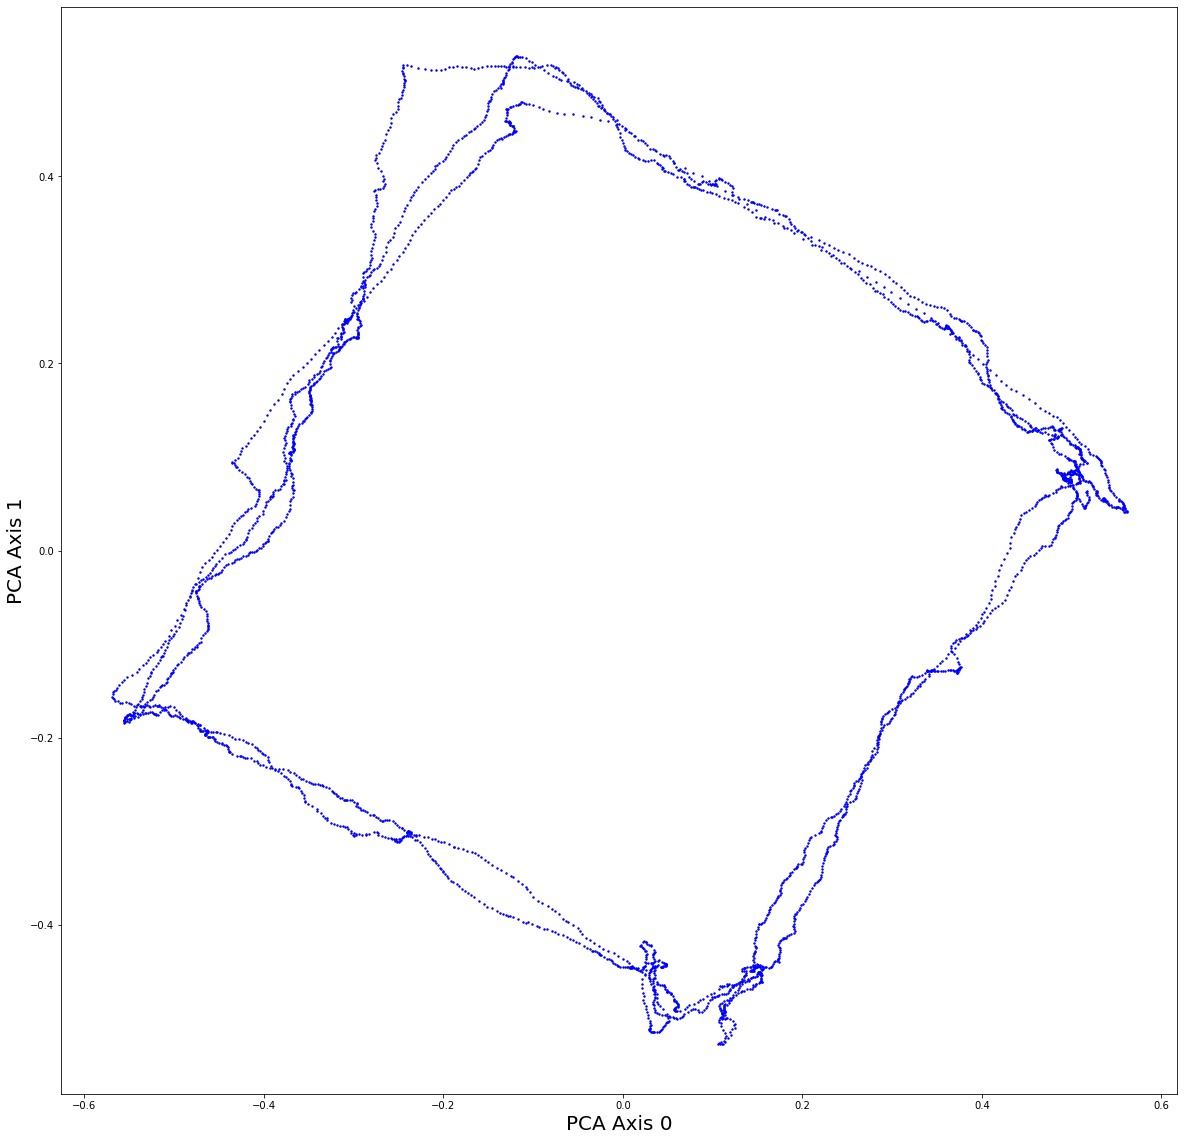

In [4]:
from IPython.display import display, clear_output

sq_eigValue, sq_eigVector = get_eigen_vectors(square_DOA)
sqProj = project_to_eigen_vectors(square_DOA, 2, sq_eigValue, sq_eigVector)

fig = plt.figure(figsize = [20,20])
ax = fig.add_subplot(1, 1, 1) 

# # Live Animation
# for i in range(sqProj.shape[0]):
#     ax.set_xlim(-1,1)
#     ax.set_ylim(-0.8,0.2)

#     ax.plot(sqProj[i,0], sqProj[i,1], marker='x')
#     display(fig)
    
#     clear_output(wait = True)
#     plt.pause(10e-9)

plt.scatter(sqProj[:,0], sqProj[:,1], c='b', s=2)
plt.xlabel("PCA Axis 0", fontsize=20)
plt.ylabel("PCA Axis 1", fontsize=20)
plt.show()

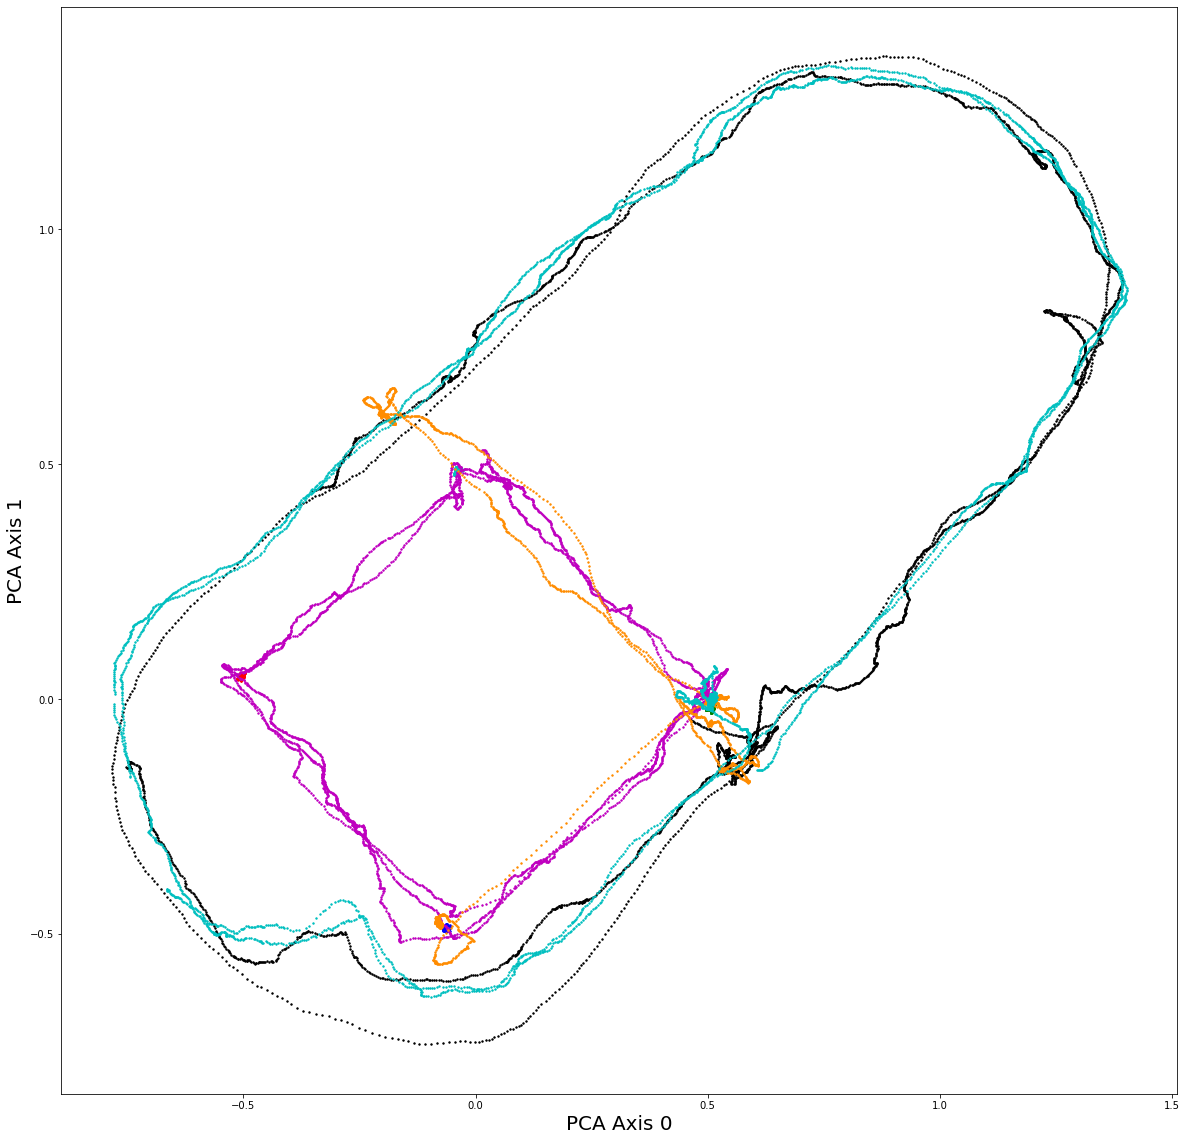

In [8]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

dim = 2 # Number of Dimensions (2D or 3D)

# Using Array [0,1,3,4,5], CP_LIST using microphone [0,1,3,4,5]
all_data = np.vstack([CP_LIST[i] for i in CP_INDICES])[:, :]
# all_data = np.vstack([all_data[:, 0:6], square_DOA[:, 0:6]])
square_customDOA = np.hstack([ square_DOA[:,0:6], square_DOA[:,9:] ])
all_data = np.vstack([all_data[:, :], square_customDOA])
all_eigValues, all_eigVector = get_eigen_vectors(all_data)

# Access List -> Numpy Array (specific shape)
data0 = (CP_LIST[0])[:, :] # x69_y69
data3 = (CP_LIST[3])[:, :] # x69_y0
data6 = (CP_LIST[6])[:, :] # x0_y0
data9 = (CP_LIST[9])[:, :] # x0_y69

dataProj0 = project_to_eigen_vectors(data0, dim, all_eigValues, all_eigVector)
dataProj3 = project_to_eigen_vectors(data3, dim, all_eigValues, all_eigVector)
dataProj6 = project_to_eigen_vectors(data6, dim, all_eigValues, all_eigVector)
dataProj9 = project_to_eigen_vectors(data9, dim, all_eigValues, all_eigVector)

fig = plt.figure(figsize = [20,20])
plt.scatter(dataProj0[:,0], dataProj0[:,1], c='r', s=2)
plt.scatter(dataProj3[:,0], dataProj3[:,1], c='b', s=2)
plt.scatter(dataProj6[:,0], dataProj6[:,1], c='g', s=2)
plt.scatter(dataProj9[:,0], dataProj9[:,1], c='c', s=2)

# square uses microphone [0,1,2,3,4,5]
sqProj = project_to_eigen_vectors(square_customDOA, dim, all_eigValues, all_eigVector)
plt.scatter(sqProj[:,0], sqProj[:,1], c='m', s=2)

# table1 Array: [0,1,2,3,4,5]
table1_customDOA = np.hstack([ table1_DOA[:,0:6], table1_DOA[:,9:] ])
table1Proj = project_to_eigen_vectors(table1_customDOA, dim, all_eigValues, all_eigVector)
plt.scatter(table1Proj[:,0], table1Proj[:,1], c="k", s=2)

# lineProj Array: [0,1,2,3,4,5]
line_customDOA = np.hstack([ line_DOA[:,0:6], line_DOA[:,9:] ])
lineProj = project_to_eigen_vectors(line_customDOA, dim, all_eigValues, all_eigVector)
plt.scatter(lineProj[:,0], lineProj[:,1], c="darkorange", s=2)

# table2Proj Array: [0,1,2,3,4,5]
table2_customDOA = np.hstack([ table2_DOA[:,0:6], table2_DOA[:,9:] ])
table2Proj = project_to_eigen_vectors(table2_customDOA, dim, all_eigValues, all_eigVector)
plt.scatter(table2Proj[:,0], table2Proj[:,1], c="c", s=2)

plt.xlabel("PCA Axis 0", fontsize=20)
plt.ylabel("PCA Axis 1", fontsize=20)
plt.show()

In [6]:
from Mapping import generate_linear_transform_matrix

import importlib
importlib.reload(sys.modules["Mapping"])

dim = 2 # 2D
CP_CUSTOM = [cp[:,:] for cp in CP_LIST]
B, R_mean, D_mean, D = generate_linear_transform_matrix(CP_CUSTOM, np.vstack([ROOM_LIST[i] for i in CP_INDICES]), dim)

# find displacement of mean in room space
R_0 = R_mean-B @ D_mean
# affine transform all DOA points
r = R_0 + B @ D
print("r's shape: ", r.shape)
print("D's shape: ", D.shape)

R =  [[70. 70. 70. ...  1.  1.  1.]
 [70. 70. 70. ... 70. 70. 70.]]
R_mean:  [[35.5]
 [35.5]]
r's shape:  (2, 4800)
D's shape:  (15, 4800)


(2, 3436)


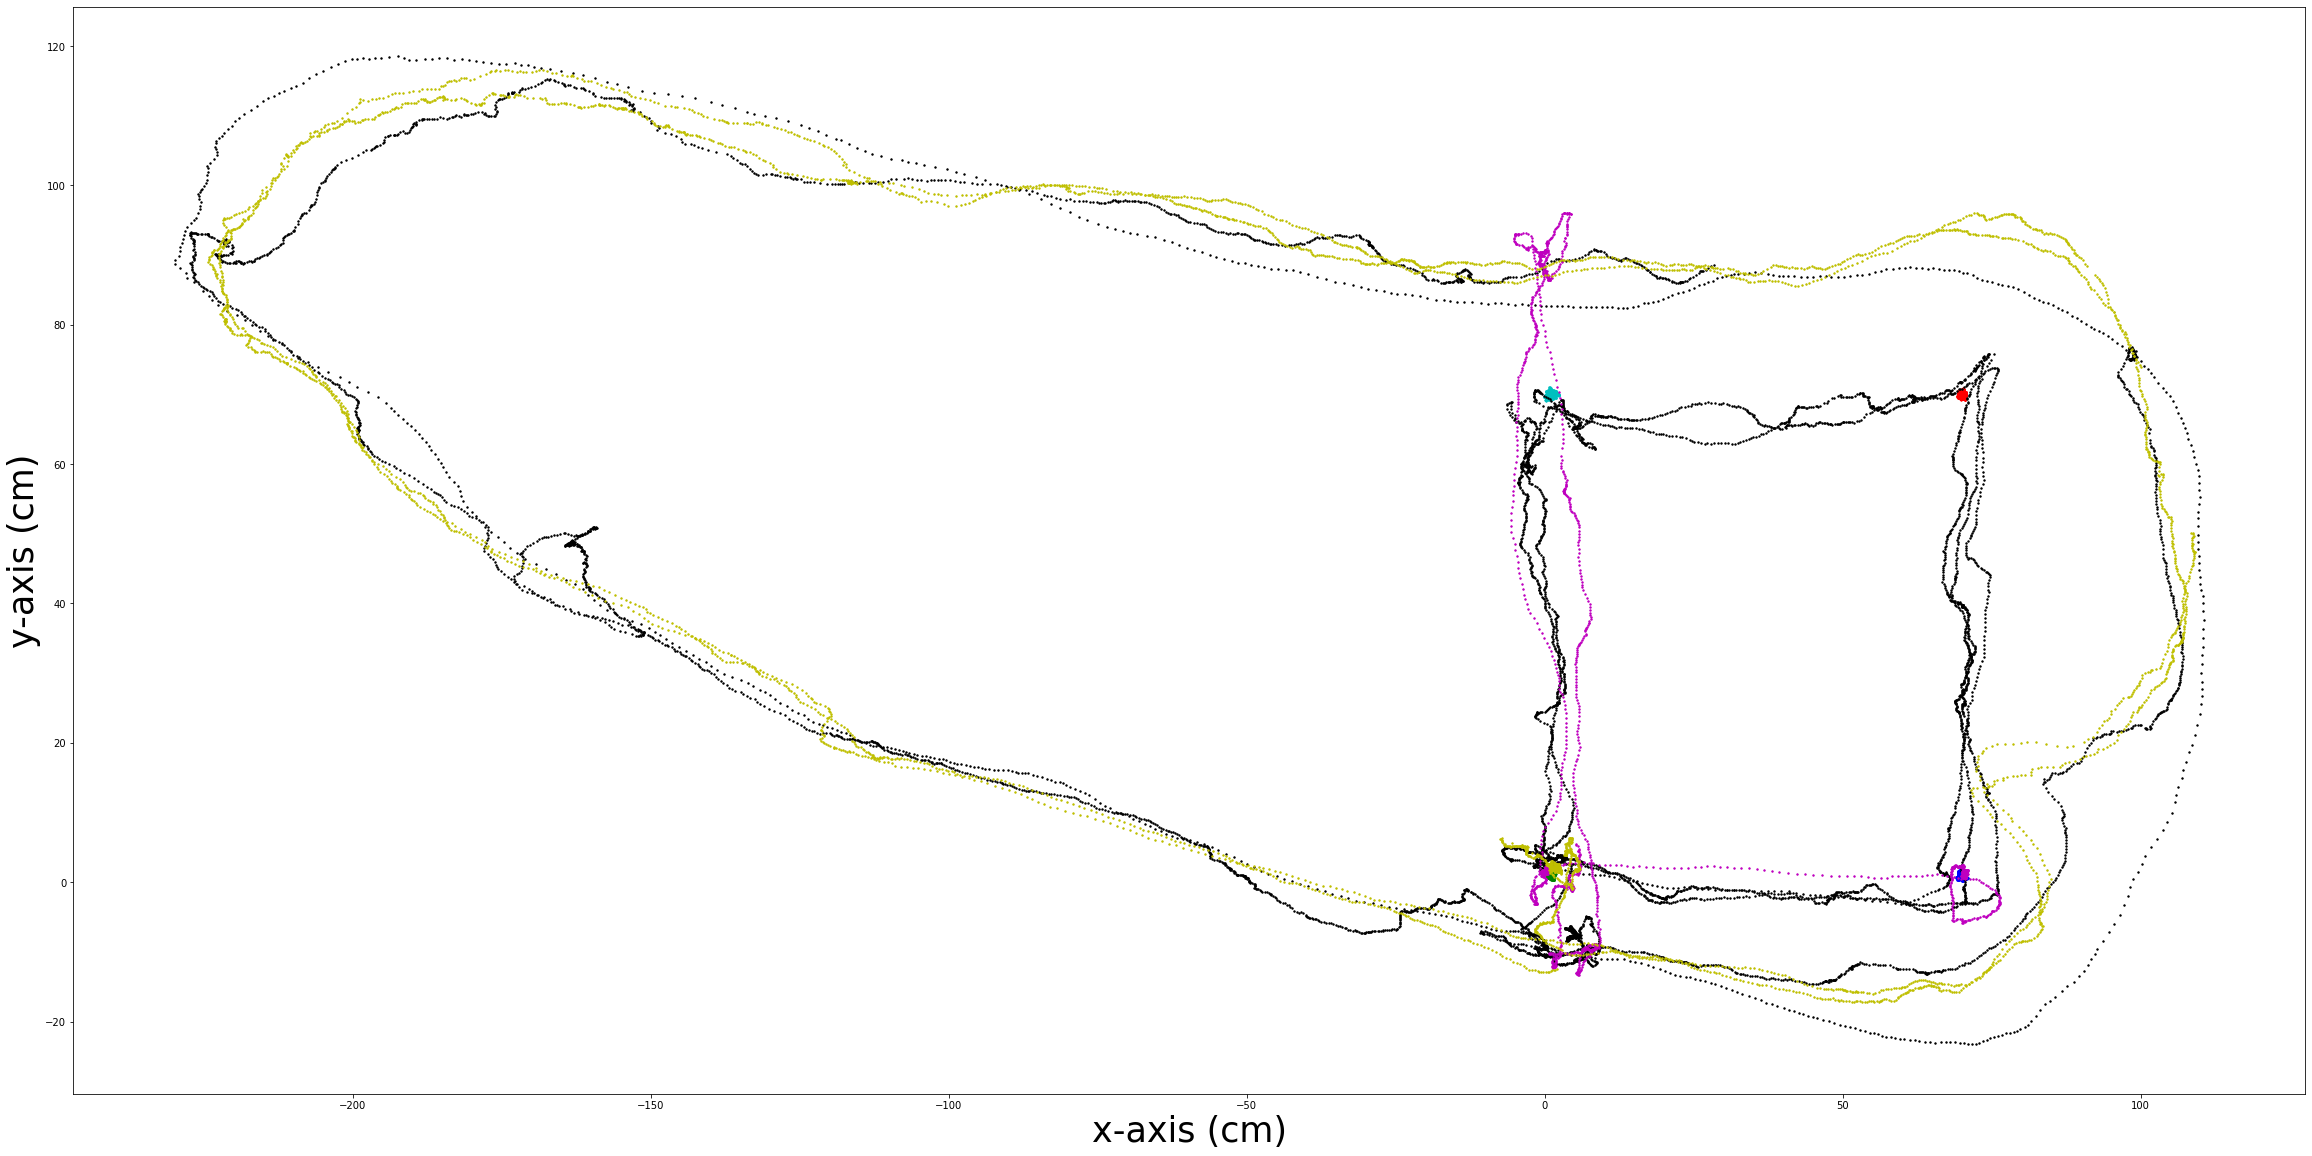

In [7]:
# Plot towards x-y plane
square_customDOA = np.hstack([ square_DOA[:,0:6], square_DOA[:,9:] ])
sq_r = R_0 + B @ square_customDOA.T
print(sq_r.shape)

table1_customDOA = np.hstack([ table1_DOA[:,0:6], table1_DOA[:,9:] ])
line_customDOA = np.hstack([ line_DOA[:,0:6], line_DOA[:,9:] ])
table2_customDOA = np.hstack([ table2_DOA[:,0:6], table2_DOA[:,9:] ])

table1_r = R_0 + B @ table1_customDOA.T
line_r = R_0 + B @ line_customDOA.T
table2_r = R_0 + B @ table2_customDOA.T

fig = plt.figure(figsize = [40,20])
ax = fig.add_subplot(1,1,1)

ax.scatter(r[0,0:1200], r[1,0:1200], c='r', s=2)
ax.scatter(r[0,1201:2400], r[1,1201:2400], c='b', s=2)
ax.scatter(r[0,2401:3600], r[1,2401:3600], c='g', s=2)
ax.scatter(r[0,3601:], r[1,3601:], c='c', s=2)

ax.scatter(sq_r[0,:], sq_r[1,:], c="k", s=2)
ax.scatter(table1_r[0,:], table1_r[1,:], c="k", s=2)
ax.scatter(line_r[0,:], line_r[1,:], c="m", s=2)
ax.scatter(table2_r[0,:], table2_r[1,:], c="y", s=2)

plt.xlabel("x-axis (cm)", fontsize=35)
plt.ylabel("y-axis (cm)", fontsize=35)
# print("Middle point = ", np.mean(center_r, axis=1))
plt.show()